In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

TM6_glial_ECM_help (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [3]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end;

In [21]:
t = 500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [22]:
τ = 0.013;  τD = 0.07993;  τy = 3.3;  J = 3.07;  β = 0.300
xthr = 0.75; ythr = 0.4
α = 1.58;  U0 = 0.3;  ΔU0 = 0.305;  I0 = -1.65;

In [23]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.65]
 time:          0.0
 state:         [8.39353, 0.73803, 0.429055]


In [24]:
lb_size = 35; tck_size = 30;

In [25]:
tr, trange = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

In [19]:
ts, tf = 1, 10000

(1, 10000)

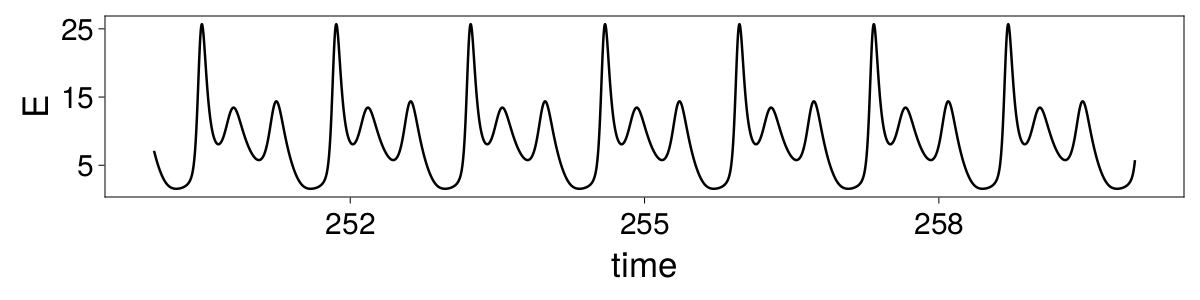

In [27]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [5, 15, 25])
            
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [28]:
save("timeseries_burst_Levanova.eps", f)

CairoMakie.Screen{EPS}


In [ ]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.55, 0.75, 0.9], zticks = [5, 15, 25])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 3.0, color = :black)
f

In [129]:
# save("phase_burst_Levanova.eps", f)